In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, KBinsDiscretizer
from math import sqrt


combined = pd.read_csv("CombineDdata.csv")


In [2]:
#X = combined.drop("Income in EUR",1)   #Feature Matrix
y = combined[["Instance","Income in EUR"]]

X = combined[["Instance","Year of Record","Age","Profession","Gender","Country","University Degree","Size of City","Body Height [cm]"]].copy()

In [3]:
def ReplaceNan_Numeric(df,F_Name):
    average = df[F_Name].dropna().mean(axis=0)
    df[F_Name] = df[F_Name].replace(np.nan, average, inplace=False)
    return df

In [4]:
def oneHotEncode_Feature(df,F_Name):
    feature = df[F_Name]
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(feature)
    
    #binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    feature_onehot = pd.DataFrame(onehot_encoded)
    df = df.drop(F_Name,1)   #Feature Matrix
    new_df = pd.concat([df, feature_onehot], axis=1)
    return new_df

In [5]:
def KBins_Feature(df, F_Name):
    feature_array = df[F_Name].to_numpy()
    feature_array = feature_array.reshape(-1, 1)
    est = KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='quantile')
    est.fit(feature_array)
    onehot_encoded = est.transform(feature_array)
    
    onehot_feature_df = pd.DataFrame(onehot_encoded)
    df = df.drop(F_Name,1)   #Feature Matrix
    new_df = pd.concat([df, onehot_feature_df], axis=1)
    return new_df

In [6]:
def MinMaxScale_Feature(df, F_Name):
    feature_array = df[F_Name].to_numpy()
    feature_array = feature_array.reshape(-1, 1)
    
    scaler = MinMaxScaler()
    scaled_array = scaler.fit_transform(feature_array)
    
    scaled_df = pd.DataFrame(scaled_array)
    df = df.drop(F_Name,1)   #Feature Matrix
    new_df = pd.concat([df, scaled_df], axis=1)
    return new_df

In [7]:
X = ReplaceNan_Numeric(X,"Year of Record")
X = ReplaceNan_Numeric(X,"Body Height [cm]")


X = ReplaceNan_Numeric(X,"Age")
X = ReplaceNan_Numeric(X,"Size of City")



In [8]:
X = MinMaxScale_Feature(X,"Year of Record")
X = MinMaxScale_Feature(X,"Age")
X = MinMaxScale_Feature(X,"Body Height [cm]")

In [9]:

X = KBins_Feature(X,"Size of City")

In [10]:
X["Profession"] = X["Profession"].replace(np.nan, "Unknown", inplace=False)

X = oneHotEncode_Feature(X,"Profession")

c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
X["Gender"] = X["Gender"].replace(np.nan, "unknown", inplace=False)
print(X["Gender"].unique())

X = oneHotEncode_Feature(X,"Gender")

['0' 'other' 'female' 'male' 'unknown']


c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [12]:
X["Country"] =  X["Country"].replace(np.nan, "Unknown", inplace=False)

X = oneHotEncode_Feature(X,"Country")

c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
X["University Degree"] = X["University Degree"].replace(np.nan, "Unknown", inplace=False)
X["University Degree"] = X["University Degree"].replace('0', "No", inplace=False)
X["University Degree"] = X["University Degree"].replace('', "Unknown", inplace=False)

X = oneHotEncode_Feature(X,"University Degree")

c:\users\chris\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
df2_X = X.loc[X["Instance"] > 111993]
X = X.loc[X["Instance"] <= 111993]


          
#df2_y = y.loc[y["Instance"] > 111993] #not needed
y = y.loc[y["Instance"] <= 111993]

df2_X = df2_X.drop("Instance",1)
X = X.drop("Instance",1)

y = y.drop("Instance",1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [15]:
# Create linear regression object
regr = RidgeCV(alphas=np.array([0.0001,0.001,0.01,0.1,1]),fit_intercept=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [16]:

print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Root Mean squared error: 79440.76
Variance score: 0.70


In [17]:
df2_y_pred = regr.predict(df2_X)


In [18]:
pd.DataFrame(df2_y_pred).to_csv("Results2.csv")

ValueError: x and y must be the same size

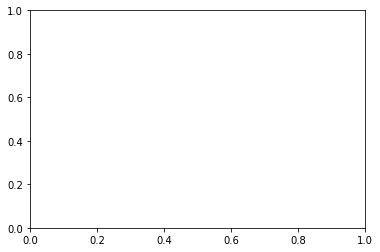

In [14]:
plt.scatter(X_test["Year of Record"], y_test,  color='black')
plt.plot(X_test["Year of Record"], y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

